# Normalization and Filters

In this notebook, we'll explore image normalization and filters.

Let's start by loading and visualizing an image.

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


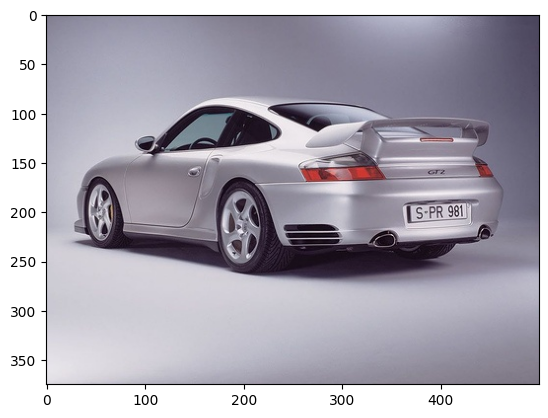

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

# Required magic to display matplotlib plots in notebooks

# Load the image from the source file
image_file = "data/voc/automobile/000142.jpg"
image = mp_image.imread(image_file)

# Display it
plt.imshow(image)

## Image Normalization

Let's look at the distribution of pixel values in the image. Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

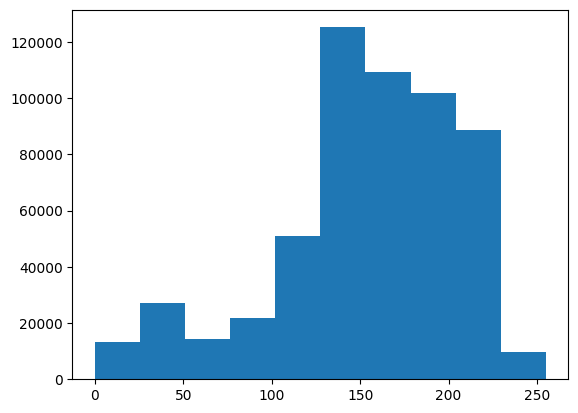

In [2]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

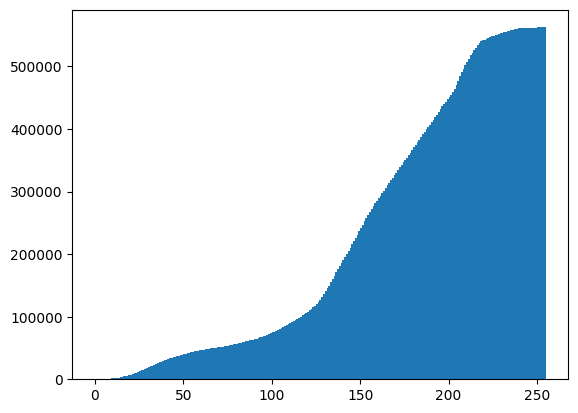

In [3]:
plt.hist(image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

One simple way to do this is to apply a technique called *contrast stretching*, in which you rescale the pixel values to ensure that all values between a very low and very high percentile (usually the 2nd percentile and 98th percentile) are mapped to the range 0 to 255 - in effect "stretching" the histogram to try to ensure the distribution covers the full range of possible values.

*Histogram equalization* is a more complex operation that creates a more uniform distribution. The code in the cell below uses the **exposure.rescale_intensity** and  **exposure.equalize_hist** methods from the **skimage** package to perform contrast stretching and histogram equalization.

c:\Users\SABIO\Documents\GitHub\IE-University\myenv312\Lib\site-packages\skimage\_shared\utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


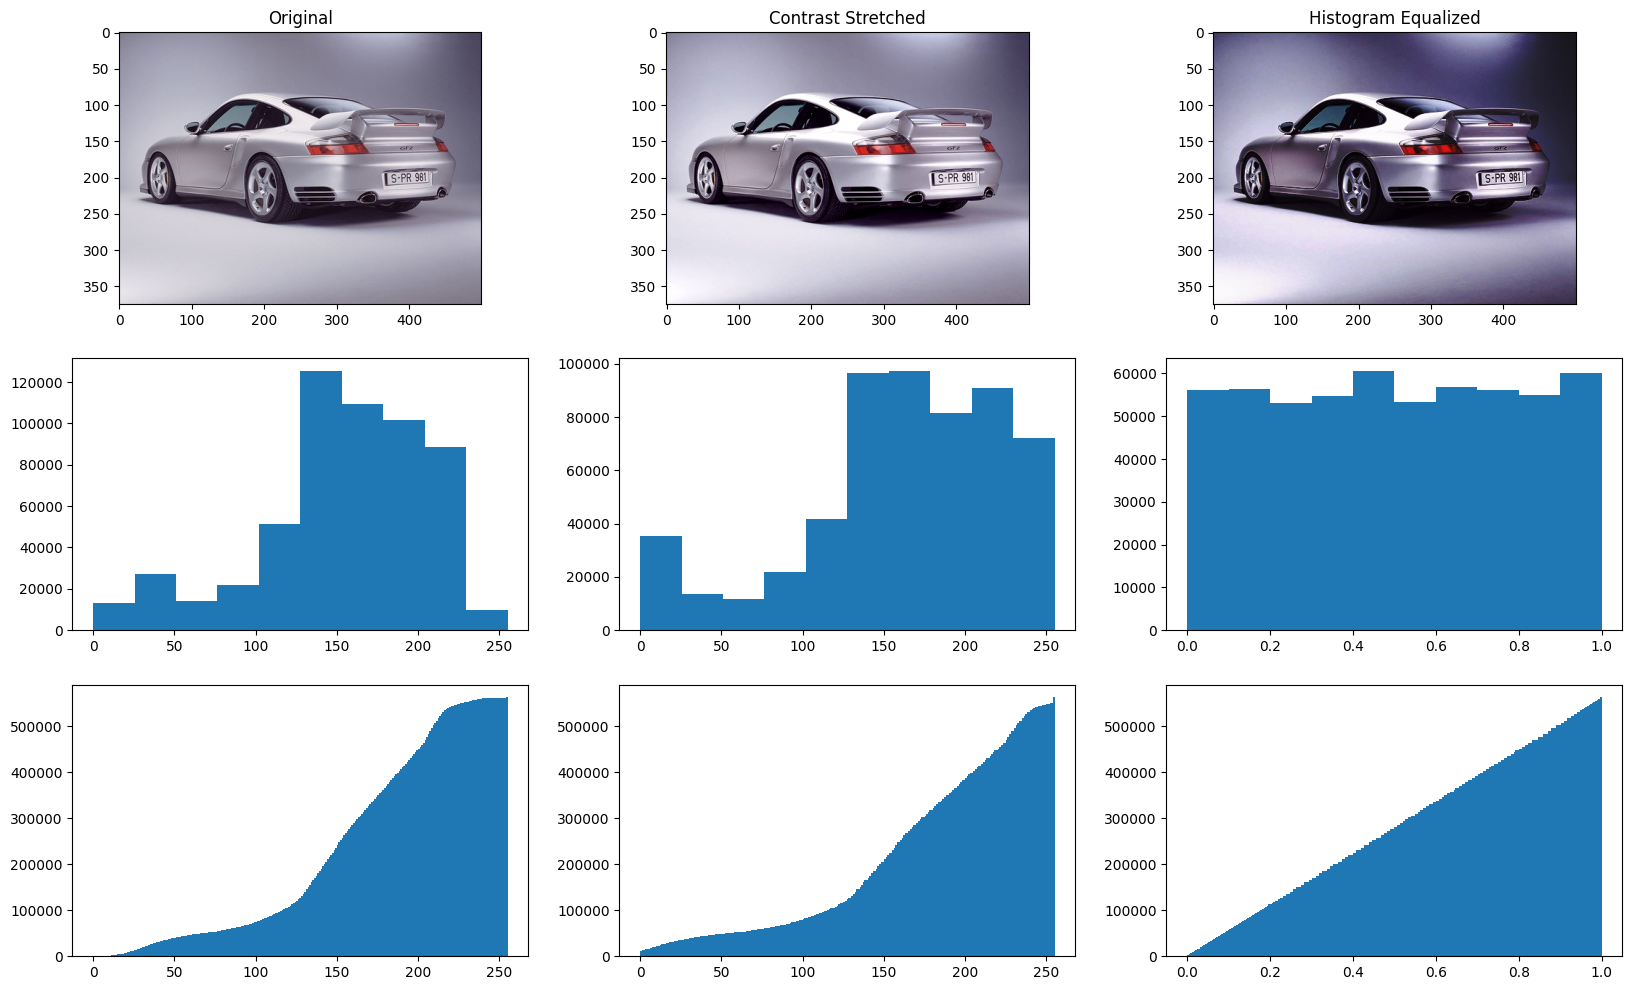

In [4]:
from skimage import exposure
import numpy as np

# Contrast stretching
p2 = np.percentile(image, 2)
p98 = np.percentile(image, 98)
image_ct = exposure.rescale_intensity(image, in_range=(p2, p98))

# Histogram Equalization
image_eq = exposure.equalize_hist(image)

# Show the images
fig = plt.figure(figsize=(20, 12))

# Subplot for original image
a = fig.add_subplot(3,3,1)
imgplot = plt.imshow(image)
a.set_title('Original')

# Subplot for contrast stretched image
a = fig.add_subplot(3,3,2)
imgplot = plt.imshow(image_ct)
a.set_title('Contrast Stretched')

# Subplot for equalized image
a = fig.add_subplot(3,3,3)
imgplot = plt.imshow(image_eq)
a.set_title('Histogram Equalized')

# Subplots for histograms
a = fig.add_subplot(3,3,4)
imgplot = plt.hist(image.ravel())

a = fig.add_subplot(3,3,5)
imgplot = plt.hist(image_ct.ravel())

a = fig.add_subplot(3,3,6)
imgplot = plt.hist(image_eq.ravel())

# Subplots for CDFs

a = fig.add_subplot(3,3,7)
imgplot = plt.hist(image.ravel(), bins=255, cumulative=True)

a = fig.add_subplot(3,3,8)
imgplot = plt.hist(image_ct.ravel(), bins=255, cumulative=True)

a = fig.add_subplot(3,3,9)
imgplot = plt.hist(image_eq.ravel(), bins=255, cumulative=True)

plt.show()

As you can see, contrast stretching results in a histogram of mroe or less the same shape, but spread out over the full range of pixel values. The CDF is slightly smoother than for the original image. Histogram equalization has produced a much more even distribution of pixel values, and a more or less perfectly diagonal CDF; but the image itself is noticable less natural looking.

These kind of contrast enhancements can be useful when images have low contrast. They're particularly useful in medical imaging scenarios, for example to enhance X-rays. They can also be used to counteract contrast variance in a set of images that will be used to train  amachine learning model.

## Filters

Filters are implemented by defining numeric grids, called *kernels* that are convolved across an image to change the value of the pixel in the middle of the grid by calculating a weighted sum of the surrounding pixels, using the values in the kernel as weights. In practice they are used to apply visual enhancement effects to the image; such as sharpening, blurring, and so on. This can often be used to remove "noise" from an image, such as is common in photgraphs taken in low-light conditions.

Let's take a look at some common filters in the **PIL.ImageFilter** library:

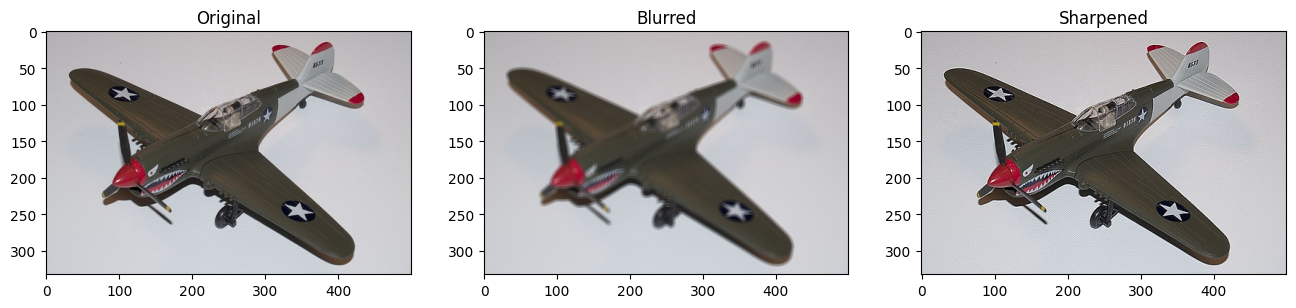

In [5]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Load the image from the source file
image_file = "data/voc/plane/002279.jpg"
image = Image.open(image_file)

blurred_image = image.filter(ImageFilter.BLUR)
sharpened_image = image.filter(ImageFilter.SHARPEN)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a = fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot blurred image
a = fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(blurred_image)
a.set_title("Blurred")

# Plot sharpened image
a = fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(sharpened_image)
a.set_title("Sharpened")

plt.show()

Since a filter kernel is just a grid of numbers, you can create your own filters as numpy arrays, like this:

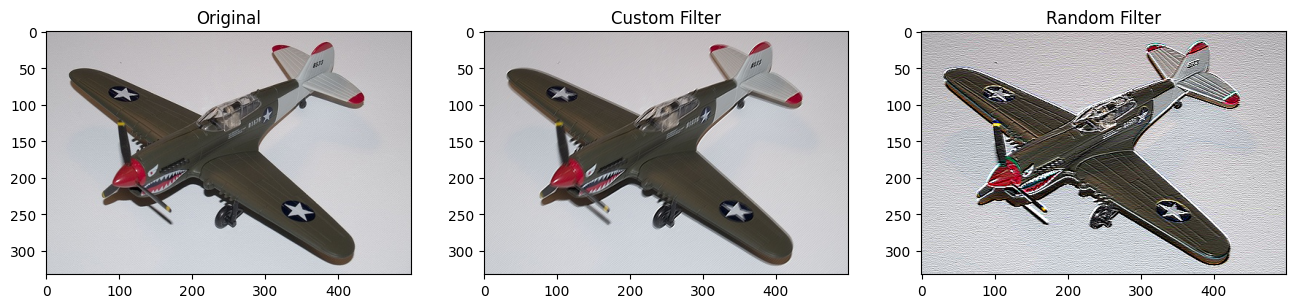

In [10]:
my_kernel = (200, 50, -100,
             -50, 200, -50,
            -100, 50, 200)

test_kernel = (300, 100, 300,
               -300, -300, -300, 
               -20, 100, 36)

filtered_image = image.filter(ImageFilter.Kernel((3,3), my_kernel))
test_filtered = image.filter(ImageFilter.Kernel((3, 3), test_kernel))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a = fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a = fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(filtered_image)
a.set_title("Custom Filter")

a = fig.add_subplot(1, 3, 3)
random_test = plt.imshow(test_filtered)
a.set_title("Random Filter")

plt.show()

### Detecting Edges

One particular use of filters is to detect the edges of objects in an image. PIL includes a FIND_EDGES filter for this purpose:

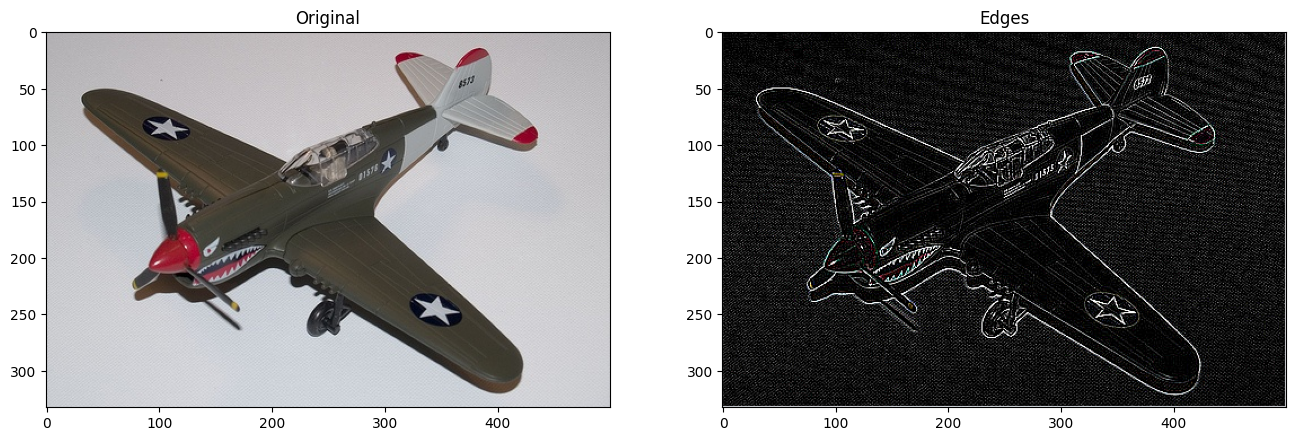

In [11]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# Load the image from the source file
image_file = "data/voc/plane/002279.jpg"
image = Image.open(image_file)

edges_image = image.filter(ImageFilter.FIND_EDGES)

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a = fig.add_subplot(1, 2, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot filtered image
a = fig.add_subplot(1, 2, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

plt.show()

If the built-in FIND-EDGES filter doesn't provide what you need, you could use a Sobel edge-detection algorithm; which involves convolving two filters across an image to find the horizontal and vertical vector gradients for each pixel, and then calculating the magnitude (length) of each vector gradient:

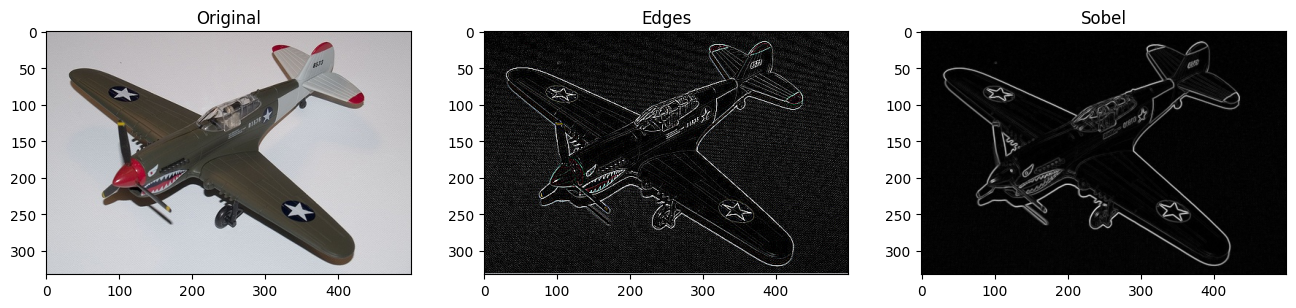

In [12]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

sobel_image = edge_sobel(np.array(image))

# Display it
fig = plt.figure(figsize=(16, 12))

# Plot original image
a = fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(image)
a.set_title("Original")

# Plot PIL FIND_EDGES image
a = fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(edges_image)
a.set_title("Edges")

# Plot Sobel image
a = fig.add_subplot(1, 3, 3)
image_plot_2 = plt.imshow(sobel_image, cmap="gray") # Need to use a gray color map as we converted this to a grayscale image
a.set_title("Sobel")

plt.show()

## Acknowledgements and Citations

The data used in this exercise includes images adapted from the PASCAL Visual Object Classes Challenge (VOC2007) dataset at http://host.robots.ox.ac.uk/pascal/VOC/voc2007/.


    @misc{pascal-voc-2007,
        author = "Everingham, M. and Van~Gool, L. and Williams, C. K. I. and Winn, J. and Zisserman, A.",
        title = "The {PASCAL} {V}isual {O}bject {C}lasses {C}hallenge 2007 {(VOC2007)} {R}esults",
        howpublished = "http://www.pascal-network.org/challenges/VOC/voc2007/workshop/index.html"}